In [5]:
import pandas as pd 
import numpy as np 


In [6]:
# data extraction 

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical


In [7]:
def load_data() :
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

    X_train = X_train.astype("float32") / 255.0
    X_test = X_test.astype("float32") / 255.0

    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)


    return (X_train, y_train), (X_test, y_test)



In [8]:
(X_train, y_train), (X_test, y_test) = load_data()



In [9]:
# let's perform feature engineering on this data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_data(X_train): 
    data_gen = ImageDataGenerator(
        rotation_range = 15,
        width_shift_range = 0.1,
        height_shift_range = 0.1, 
        horizontal_flip = True
    )

    data_gen.fit(X_train)

    return data_gen

In [10]:
data_gen = augment_data(X_train)



In [11]:
import tensorflow as tf 

def create_model(): 
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape = (32, 32, 3)), 
            tf.keras.layers.MaxPooling2D((2, 2)), 
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D((2, 2)), 
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu"), 
            tf.keras.layers.Flatten(), 
            tf.keras.layers.Dense(64, activation = "relu"), 
            tf.keras.layers.Dense(10, activation="softmax")
            
        ]
    )

    model.compile(
        optimizer = "adam", 
        loss = "categorical_crossentropy", 
        metrics = ["accuracy"]
    )

    return model 

In [15]:
def train_model(model, X_train, y_train, X_test, y_test, data_gen):
    history = model.fit(
        data_gen.flow(X_train, y_train, batch_size = 64), 
        epochs=25, 
        validation_data = (X_test, y_test)
    )

    return history

In [16]:
(X_train, y_train), (X_test, y_test) = load_data()
data_gen = augment_data(X_train)
model = create_model()


history = train_model(model, X_train, y_train, X_test, y_test, data_gen)
print("Model trained Successfully. ")

model.save("../models/cifar10_model.h5")



Epoch 1/25


/Users/rushikeshnaik/miniconda3/envs/ml-env2/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rushikeshnaik/miniconda3/envs/ml-env2/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3897 - loss: 1.6563 - val_accuracy: 0.5060 - val_loss: 1.3647
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5088 - loss: 1.3657 - val_accuracy: 0.5627 - val_loss: 1.2432
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5607 - loss: 1.2261 - val_accuracy: 0.6280 - val_loss: 1.0543
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5892 - loss: 1.1497 - val_accuracy: 0.6369 - val_loss: 1.0229
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6144 - loss: 1.0889 - val_accuracy: 0.6336 - val_loss: 1.0402
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6295 - loss: 1.0459 - val_accuracy: 0.6799 - val_loss: 0.9122
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6461 - loss: 1.0076 - val_accuracy: 0.6745 - val_loss: 0.9315
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6582 - loss: 0.9720 - val_accuracy:

Model trained Successfully. 


In [25]:
# model evaluation 

import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 

def evaluate_model(model_path, X_test, y_test): 
    model = tf.keras.models.load_model(model_path)

    loss, accuracy = model.evaluate(X_test, y_test)

    print(f"Test Accuracy {accuracy:2f}, Test Loss {loss:2f}")

    return model 


def plot_sample_predictions(model, X_test, y_test, class_names):


    predictions = model.predict(X_test)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y_test, axis=1)

    plt.figure(figsize=(10, 5))
    for i in range(5): 
        plt.subplot(1, 5, i + 1)
        plt.imshow(X_test[i])
        plt.axis('off')

    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7403 - loss: 0.7764
Test Accuracy 0.740300, Test Loss 0.776403
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


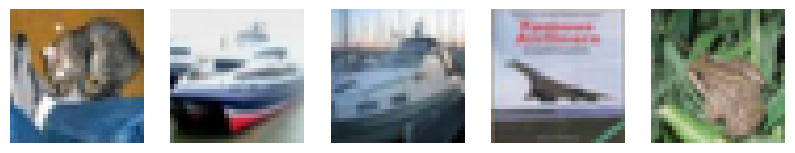

In [30]:
(X_train, y_train), (X_test, y_test) = load_data()

model = evaluate_model("../models/cifar10_model.h5", X_test, y_test)
class_name = [
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
]
plot_sample_predictions(model, X_test, y_test, class_name)



In [26]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(50000, 10))

In [27]:
(CX_train, Cy_train), (CX_test, Cy_test) = tf.keras.datasets.cifar10.load_data()

In [28]:
Cy_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], shape=(50000, 1), dtype=uint8)